In [2]:
Ethan Kessler Section B 

SyntaxError: invalid syntax (4243578592.py, line 1)

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [6]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd; import matplotlib.pyplot as plt 
data = pd.read_csv('/Users/ethankessler/Desktop/ps05-ekessler440/titanic.csv')
print(data.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [9]:
'''your code here'''
total_passengers = data.shape[0] 

In [10]:
percentage_male = (data['Sex'].sum() / total_passengers) * 100

In [11]:
percentage_survived = (data['Survived'].sum() / total_passengers) * 100

total_passengers, percentage_male, percentage_survived

(891, 64.75869809203144, 38.38383838383838)

Your written answer:

 - <891 passangers>
 - <64.8% of passangers>
 - <38.4% of passangers were female>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [17]:
'''your code here'''
fsurvived = data[data['Sex'] == 0] ['Survived'].mean()
msurvived = data[data['Sex'] == 1] ['Survived'].mean()
print(fsurvived, msurvived)

0.7420382165605095 0.18890814558058924


Your written answer:

 - <74.2% of females survived>
 - <19% of males survived>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [21]:
'''your code here'''
data.groupby('Pclass').agg({'Pclass': 'size', 'Survived': 'mean'})

,Pclass,Survived
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


In [22]:
print (216/891, 184/891, 491/891)

0.24242424242424243 0.20650953984287318 0.5510662177328844


Your written answer:

 - Class 1 
    - 24.2% tickets:
    - 63% survivorship: 
- Class 2 
    - 21% tickets:
    - 47.3% survivorship: 
- Class 3
    - 55.1% tickets:
    - 24.2% survivorship: 



### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [24]:
'''Your code here'''
survivors_df = data[data['Survived'] == 1] [['Age', 'Name', 'Sex']]
nonsurvivors_df = data[data['Survived'] == 0] [['Age', 'Name', 'Sex']]

In [25]:
nonsurvivors_df.head()

,Age,Name,Sex
0,22.0,"Braund, Mr. Owen Harris",1
4,35.0,"Allen, Mr. William Henry",1
5,30.0,"Moran, Mr. James",1
6,54.0,"McCarthy, Mr. Timothy J",1
7,2.0,"Palsson, Master. Gosta Leonard",1


In [26]:
survivors_df.head()

,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


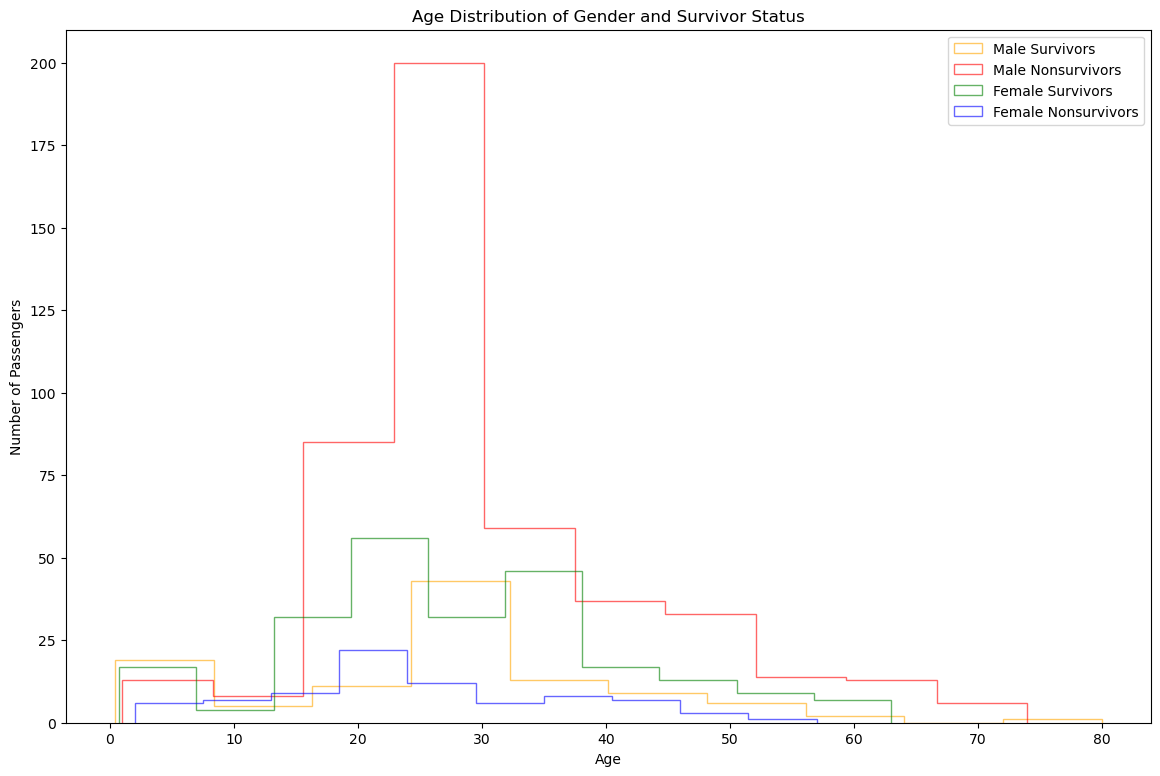

In [32]:
male_lucky = data[(data['Survived'] == 1) & (data['Sex'] == 1)]['Age']
male_unlucky = data[(data['Survived'] == 0) & (data['Sex'] == 1)]['Age']
female_lucky = data[(data['Survived'] == 1) & (data['Sex'] == 0)]['Age']
female_unlucky = data[(data['Survived'] == 0) & (data['Sex'] == 0)]['Age']

plt.figure(figsize=(14,9))

plt.hist(male_lucky.dropna(), color = 'orange', alpha = 0.6, label = 'Male Survivors', histtype = 'step')
plt.hist(male_unlucky.dropna(), color = 'red', alpha = 0.6, label = 'Male Nonsurvivors', histtype = 'step')
plt.hist(female_lucky.dropna(), color = 'green', alpha = 0.6, label = 'Female Survivors', histtype = 'step')   
plt.hist(female_unlucky.dropna(), color = 'blue', alpha = 0.6, label = 'Female Nonsurvivors', histtype = 'step') 


plt.title('Age Distribution of Gender and Survivor Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [57]:
'''Your code here'''
label = ['Survived']
features = ['Sex', 'Age', 'Pclass', 'Fare']
# we want to use all the informative data we can get!!!

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data[label], test_size = 0.2)

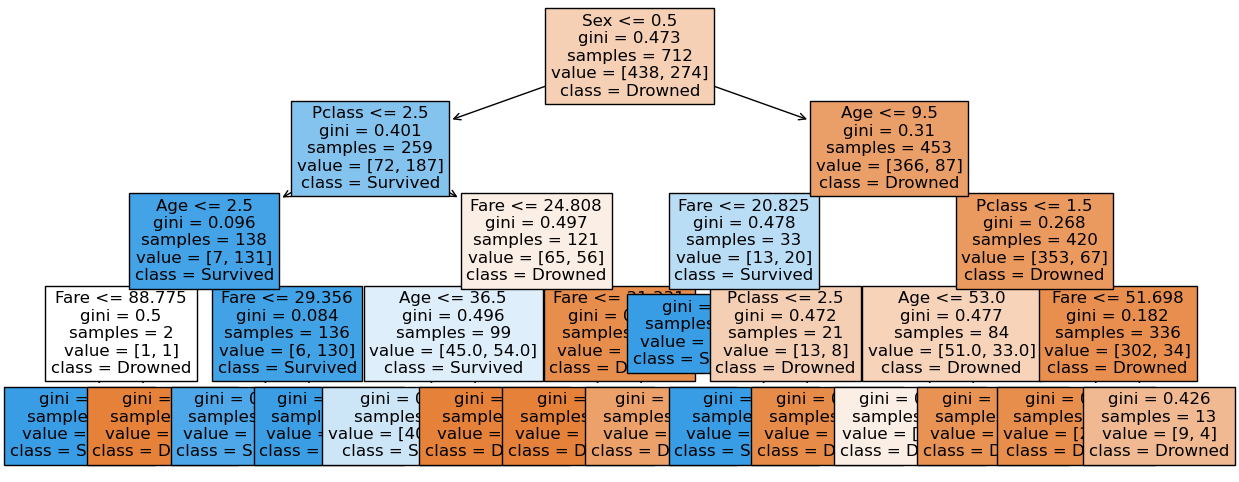

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 

tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots (1,1, figsize = (15, 6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drowned', 'Survived'],
          filled = True, fontsize = 12)
plt.show()
#tree_clf._dict_

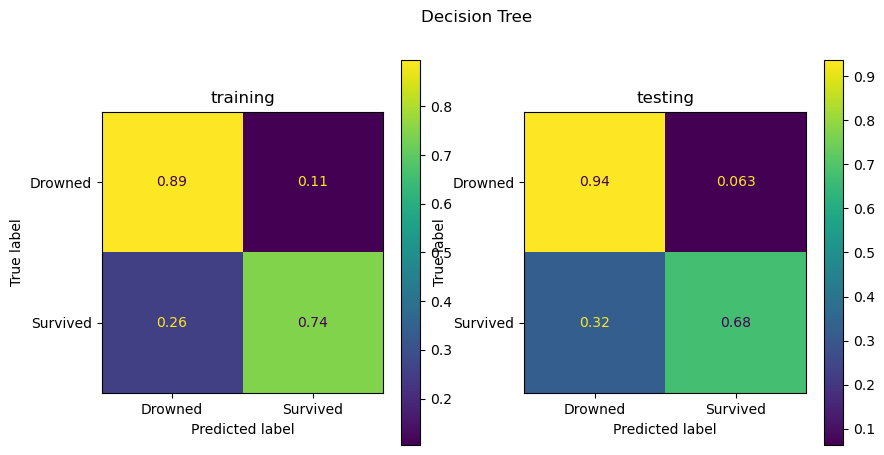

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train,
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test,
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision Tree')
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors = 15)
knn_clf.fit(Xs_train, ys_train)

KNeighborsClassifier(n_neighbors=15)

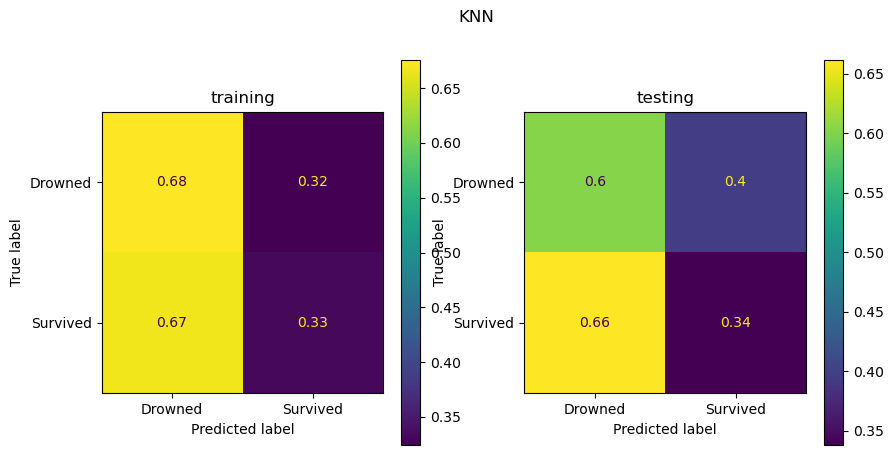

In [69]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1,2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train,
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test,
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('KNN')
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?


 - 

In [70]:
I would say that the model that works best in this senario is the plot tree since it just has more specific information and is very deatailed and just has better numbers to go off of. However, the decision tree confusion matrix display is still a good model in this senario it just is not better and gives a little less deatail and specifics but is still very good model to use. 

SyntaxError: invalid syntax (1929848289.py, line 1)